In [9]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [9]:
image = cv2.imread("Desert.jpg")

In [12]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2.imshow("Original", image)
cv2.waitKey(0)

-1

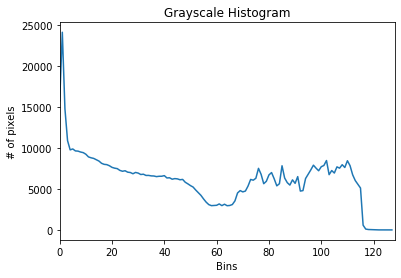

-1

In [16]:
hist = cv2.calcHist([image], [0], None, [128], [0, 256])

plt.figure()
plt.title("Grayscale Histogram")
plt.xlabel("Bins")
plt.ylabel("# of pixels")
plt.plot(hist)
plt.xlim([0, 128])
plt.show()
cv2.waitKey(0)

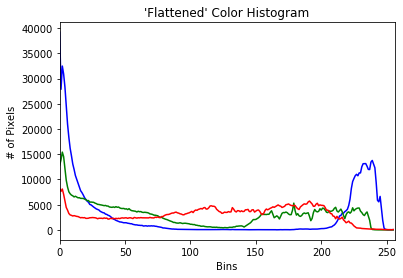

In [17]:
image = cv2.imread("Desert.jpg")

chans = cv2.split(image)
colors = ('b', 'g', 'r')
plt.figure()
plt.title("'Flattened' Color Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")

for (chan, color) in zip(chans, colors):
    hist = cv2.calcHist([chan], [0], None, [256], [0, 256])
    plt.plot(hist, color=color)
    plt.xlim([0, 256])

2D histogram shape: (16, 16), with 256 values


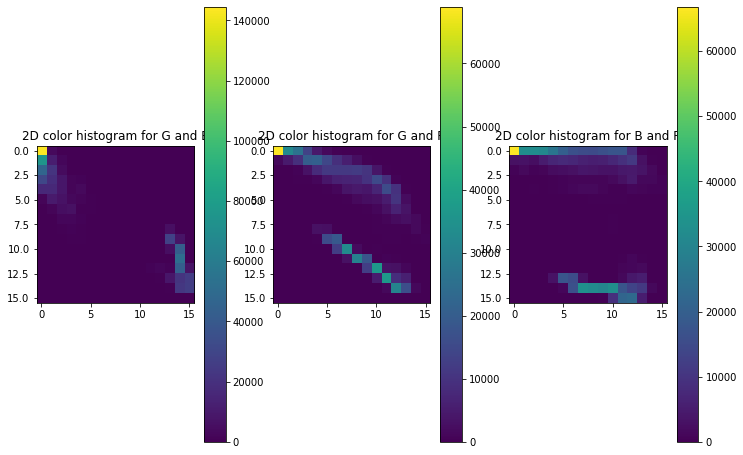

In [26]:
fig = plt.figure(figsize=(12, 8))

ax = fig.add_subplot(131)
hist = cv2.calcHist([chans[1], chans[0]], [0, 1], None, [16, 16], [0, 256, 0, 256])
p = ax.imshow(hist, interpolation='nearest')
ax.set_title("2D color histogram for G and B")
plt.colorbar(p)

ax = fig.add_subplot(132)
hist = cv2.calcHist([chans[1], chans[2]], [0, 1], None, [16, 16], [0, 256, 0, 256])
p = ax.imshow(hist, interpolation='nearest')
ax.set_title("2D color histogram for G and R")
plt.colorbar(p)

ax = fig.add_subplot(133)
hist = cv2.calcHist([chans[0], chans[2]], [0, 1], None, [16, 16], [0, 256, 0, 256])
p = ax.imshow(hist, interpolation='nearest')
ax.set_title("2D color histogram for B and R")
plt.colorbar(p)

print("2D histogram shape: {}, with {} values".format(hist.shape, hist.flatten().shape[0]))

In [28]:
hist = cv2.calcHist([image], [0, 1, 2], None, [8, 8, 8], [0, 256, 0, 256, 0, 256])
print("3D histogram shape: {}, with {} values".format(hist.shape, hist.flatten().shape[0]))
plt.show()

3D histogram shape: (8, 8, 8), with 512 values


In [31]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [33]:
eq = cv2.equalizeHist(image)
cv2.imshow("Histogram Equalization", np.hstack([image, eq]))
cv2.waitKey(0)

-1

In [12]:
def plot_histogram(image, title, mask=None):
    chans = cv2.split(image)
    colors = ('b', 'g', 'r')
    plt.figure()
    plt.title(title)
    plt.xlabel("Bins")
    plt.ylabel("# of Pixels")

    for (chan, color) in zip(chans, colors):
        hist = cv2.calcHist([chan], [0], mask, [256], [0, 256])
        plt.plot(hist, color=color)
        plt.xlim([0, 256])
    plt.show()

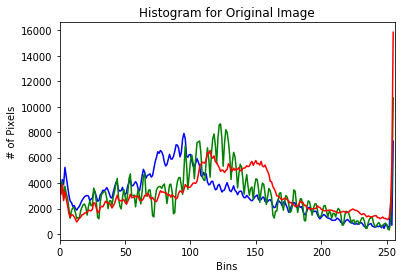

In [13]:
image = cv2.imread("Koala.jpg")
cv2.imshow("Original", image)
plot_histogram(image, "Histogram for Original Image")

In [14]:
mask = np.zeros(image.shape[:2], dtype='uint8')
cv2.rectangle(mask, (15, 15), (130, 100), 255, -1)
cv2.imshow("Mask", mask)

masked = cv2.bitwise_and(image, image, mask=mask)
cv2.imshow("Applying the Mask", masked)
cv2.waitKey(0)

-1

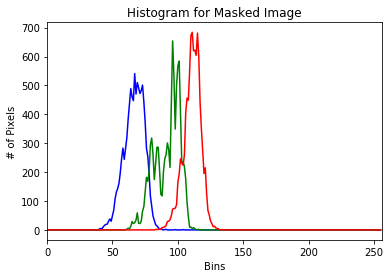

In [15]:
plot_histogram(masked, "Histogram for Masked Image", mask=mask)

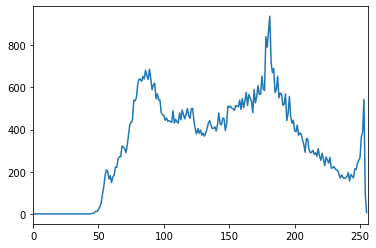

In [16]:
image = cv2.imread("wave.png")
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
hist = cv2.calcHist([gray_image], [0], None, [256], [0, 256])
plt.plot(hist)
plt.xlim([0, 256])
plt.show()

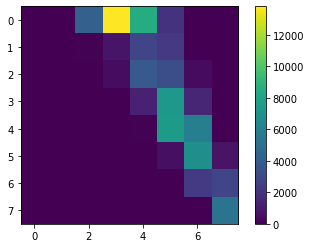

In [17]:
chans = cv2.split(image)

hist = cv2.calcHist([chans[2], chans[1]], [0, 1], None, [8, 8], [0, 256, 0, 256])
plt.imshow(hist, interpolation='nearest')
plt.colorbar()
plt.show()

In [2]:
cv2.calcHist?